In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import os

In [2]:

dataset = "Auto.csv"
path = os.path.join(os.getcwd(), "..\\..","Python\\datasets",dataset)
Auto = pd.read_csv(path,na_values=['?'])
Auto.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
Auto = Auto.dropna()
print(Auto.shape)

(392, 9)


In [4]:
Auto['horsepower'].astype(float)
Auto['horsepower'].dtype

dtype('float64')

In [5]:
y = Auto['mpg']
X = pd.DataFrame({'intercept' : np.ones(Auto.shape[0]),'horsepower' : Auto['horsepower']})
X[:4]

,intercept,horsepower
0,1.0,130.0
1,1.0,165.0
2,1.0,150.0
3,1.0,150.0


In [6]:
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 06 Sep 2025   Prob (F-statistic):           7.03e-81
Time:                        22:39:24   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.0

In [7]:
def abline(ax,b,m,*args,**kwargs):
    "Adds a line with slope m and intercept b"
    x_lim = ax.get_xlim()
    y_lim = [m*x_lim[0] + b, m*x_lim[1] + b]
    ax.plot(x_lim,y_lim,*args,**kwargs)

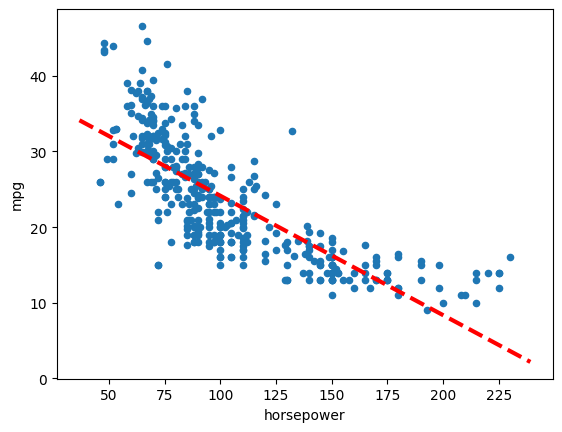

In [8]:
ax = Auto.plot.scatter('horsepower','mpg')
abline(ax,results.params.iloc[0],results.params.iloc[1],'r--',linewidth = 3)